<a href="https://colab.research.google.com/github/biaraujof99/Machine-Learning-/blob/main/Graduation_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerando modelo de Machine Learning (classificação)
# Domínio: Taxa de graduação.
# Beatriz Florencio de Araujoo

In [1]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
#Carrega o dataset com os dados para o treinamento e validacao
df_crioterapia_treino = pd.read_csv("graduation_rate.csv", encoding="utf-8")

In [6]:
df_crioterapia_treino.describe()

,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,28.607000,1999.906000,67377.85200,3.707400,3.376500,4.982000
std,2.774211,145.078361,18827.33105,0.287381,0.237179,1.414099
min,20.000000,1598.000000,18906.00000,2.800000,2.600000,3.000000
25%,27.000000,1898.000000,54269.75000,3.500000,3.200000,4.000000
50%,28.500000,2000.000000,67842.50000,3.800000,3.400000,5.000000
75%,31.000000,2099.000000,80465.50000,4.000000,3.500000,6.000000
max,36.000000,2385.000000,124470.00000,4.000000,4.000000,10.000000


In [7]:
# Verificando o formato dos dados
df_crioterapia_treino.shape

(1000, 7)

In [9]:
# Verificando as primeiras linhas do dataset
df_crioterapia_treino.head(5)

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


In [10]:
# Verificando as ultimas linhas do dataset
df_crioterapia_treino.tail(5)

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
995,32,2234,some college,30658,4.0,3.0,10
996,27,1930,some college,59443,3.6,3.2,4
997,32,2117,associate's degree,94415,4.0,3.8,4
998,32,2034,some high school,31713,3.9,3.2,8
999,34,2268,bachelor's degree,93832,4.0,3.8,6


In [11]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df_crioterapia_treino, size=35):
    corr = df_crioterapia_treino.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

<ipython-input-11-a8605ded7828>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_crioterapia_treino.corr()


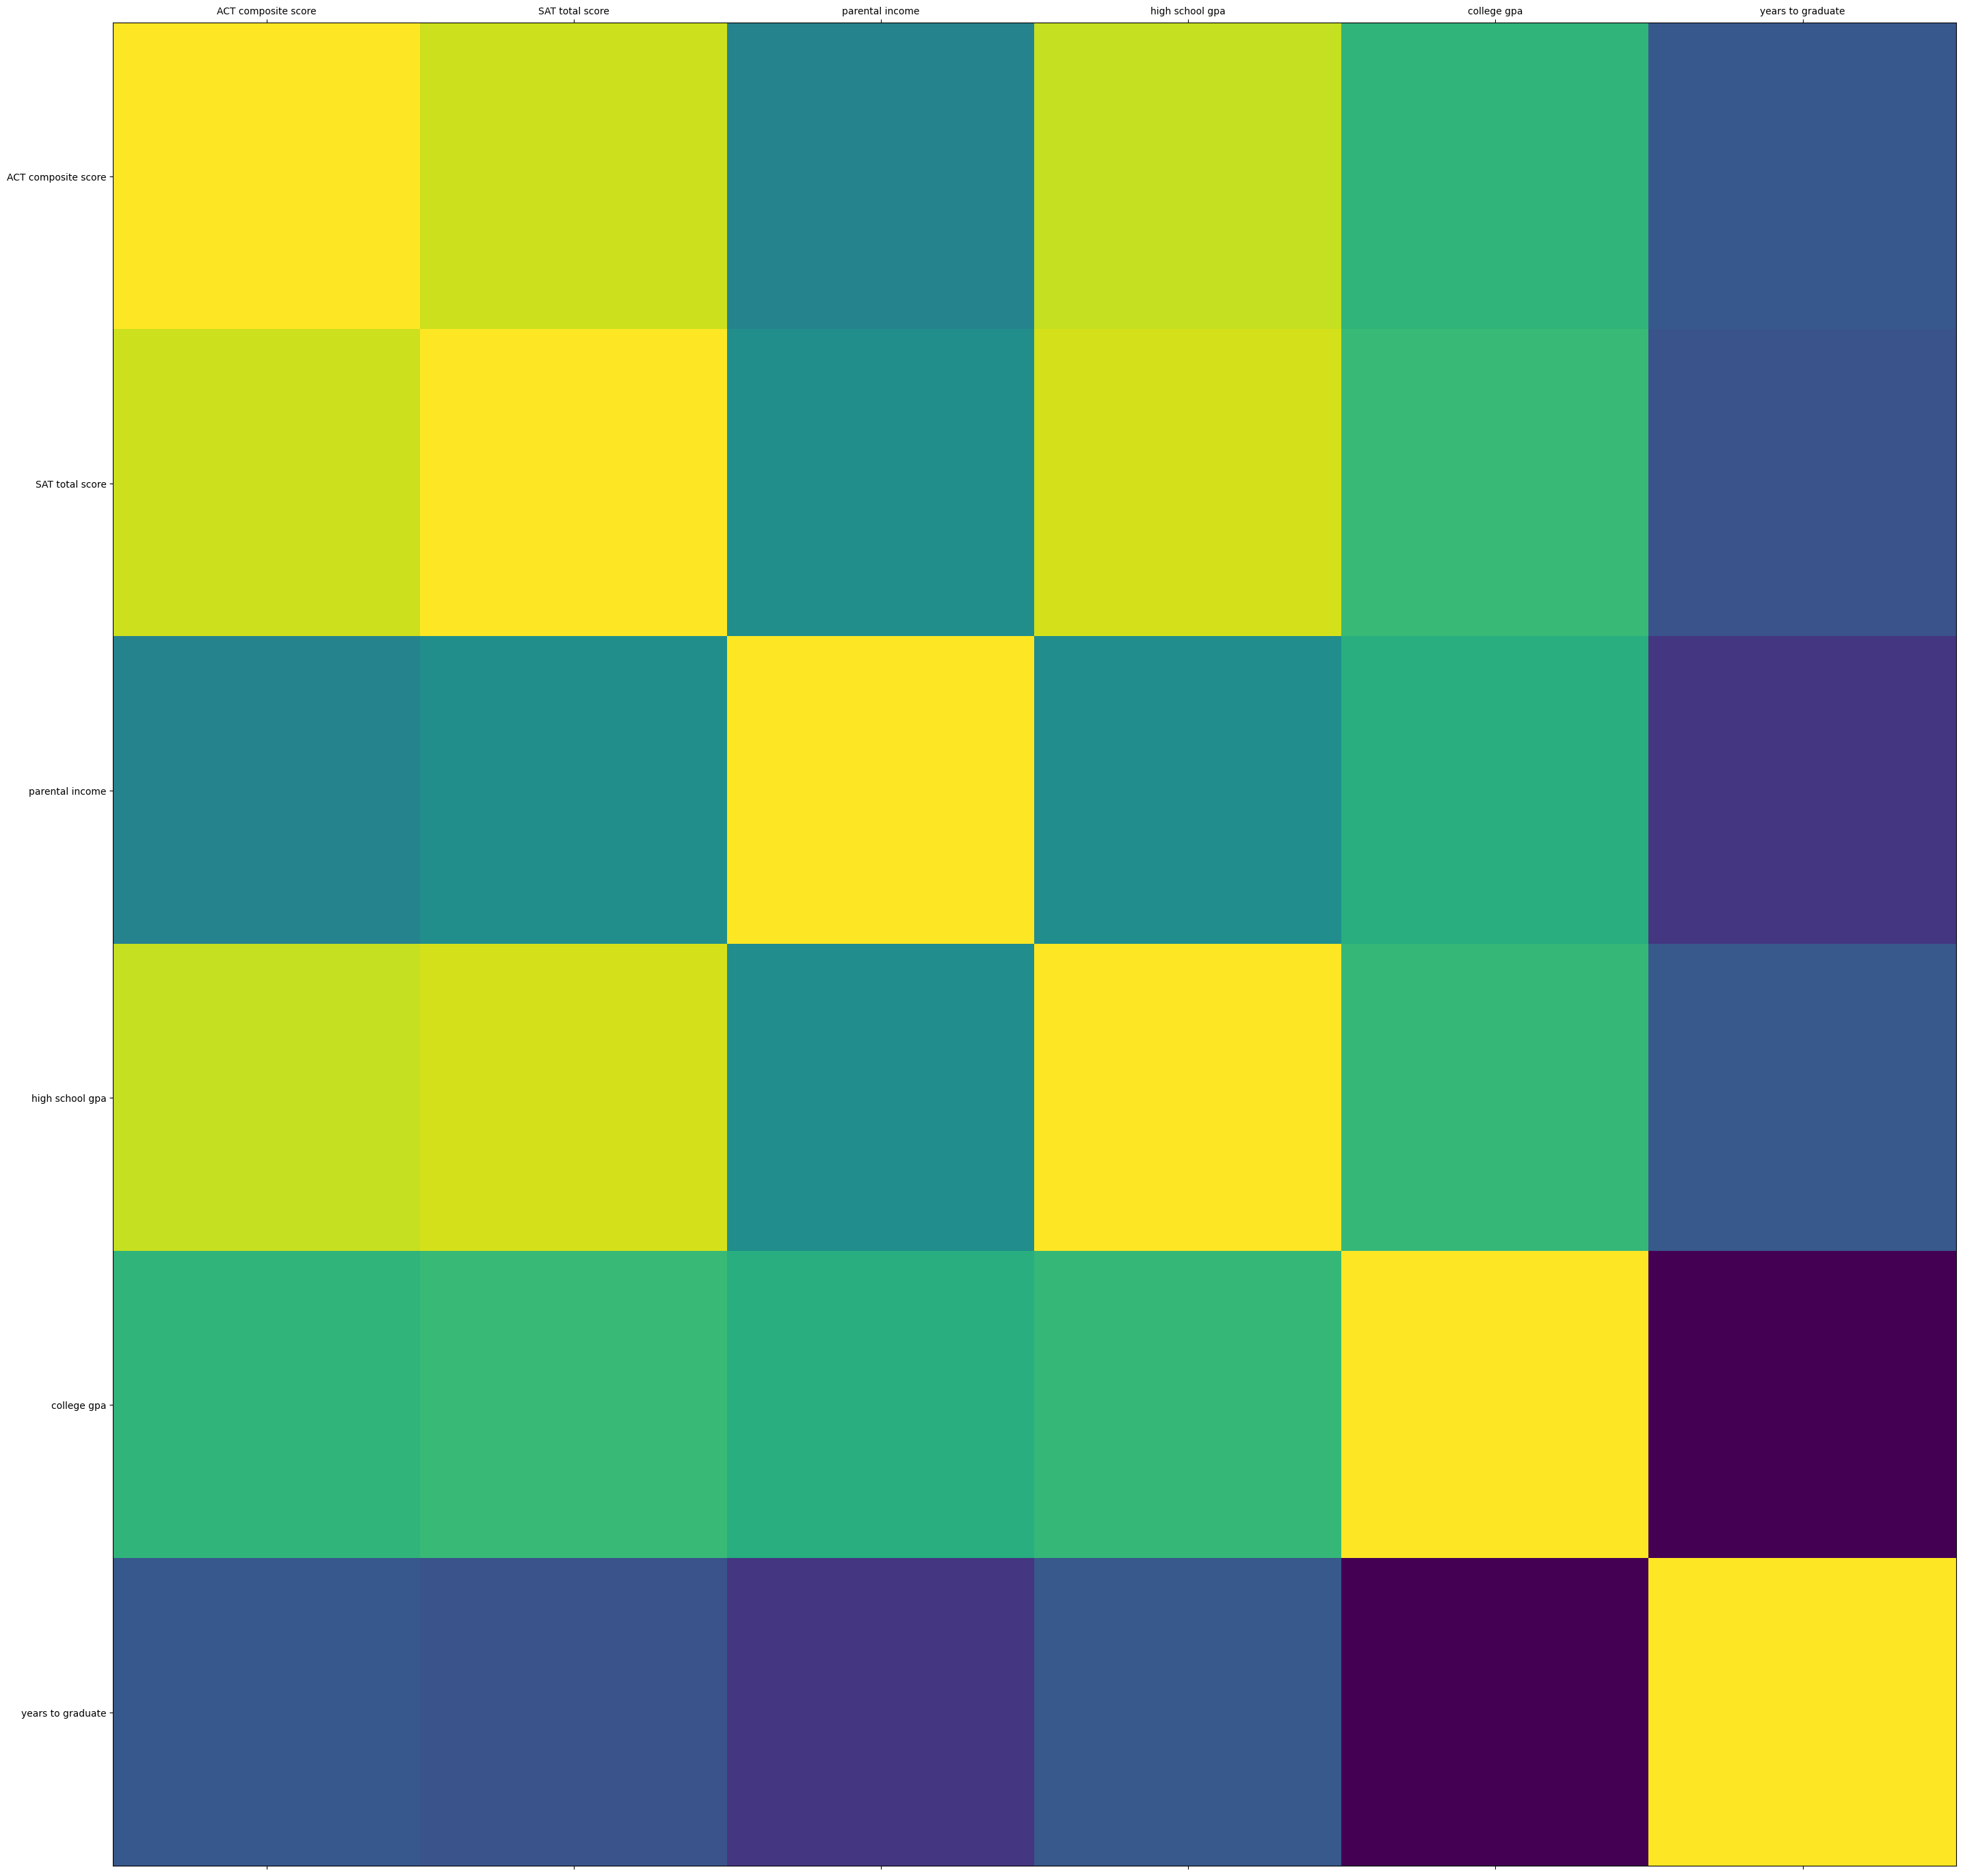

In [12]:
# Criando o gráfico - Matriz de Correlação..
plot_corr(df_crioterapia_treino)

In [13]:
# Spliting = 70% para dados de treino e 30% para dados de teste